In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

%matplotlib inline

In [4]:
df = pd.read_csv('fcc-forum-pageviews.csv', index_col='date')

df.head()

,value
date,
2016-05-09,1201
2016-05-10,2329
2016-05-11,1716
2016-05-12,10539
2016-05-13,6933


In [3]:
df.shape

(1304, 2)

In [4]:
df.describe()

,value
count,1.304000e+03
mean,6.722068e+04
std,5.933964e+04
min,1.201000e+03
25%,3.575775e+04
50%,5.719750e+04
75%,8.388300e+04
max,1.173655e+06


In [5]:
df = df.set_index('date')

df.head()

,value
date,
2016-05-09,1201
2016-05-10,2329
2016-05-11,1716
2016-05-12,10539
2016-05-13,6933


In [6]:
#cleaning the data:

df = df[(df['value'] >= df['value'].quantile(0.025))  & 
       (df['value'] <= df['value'].quantile(0.975))]

df.head()

,value
date,
2016-05-19,19736
2016-05-26,18060
2016-05-27,19997
2016-05-28,19044
2016-05-29,20325


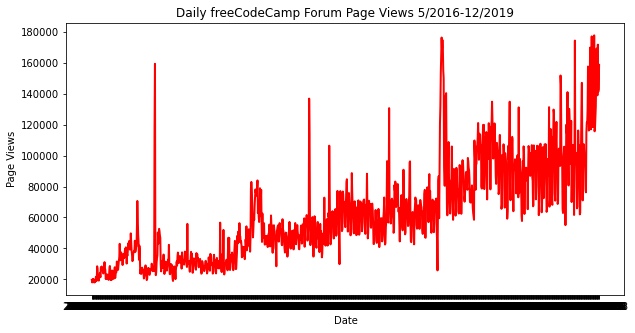

In [7]:
def draw_line_plot():
    fig, ax = plt.subplots(figsize = (10, 5))
    
    ax = plt.plot(df.index, df['value'], color = 'red', linewidth = 2)
    plt.title('Daily freeCodeCamp Forum Page Views 5/2016-12/2019')
    plt.xlabel('Date', fontsize = 10)
    plt.ylabel('Page Views', fontsize = 10)
    
    plt.show(fig)
    
draw_line_plot()    

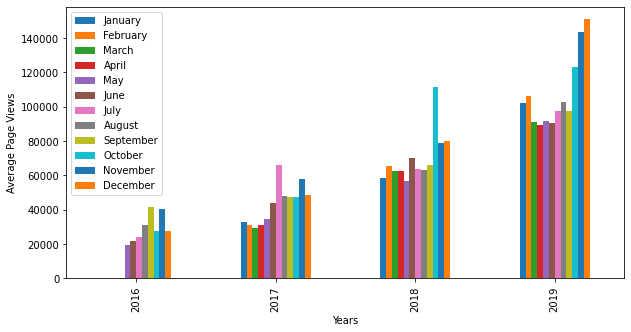

In [8]:
def draw_bar_plot():
    # modifying the dataframe for bar plot:
    df['month'] = pd.DatetimeIndex(df.index).month
    df['year'] = pd.DatetimeIndex(df.index).year
    
    df_new = df.groupby(['year', 'month'])['value'].mean()
    df_new = df_new.unstack()
    
    # drawing the bar plot:
    
    #fig, ax = plt.subplots(figsize = (10, 5))
    
    fig = df_new.plot(kind = 'bar',
                    legend = True,
                     figsize = (10,5)).figure
    plt.xlabel('Years', fontsize = 10)
    plt.ylabel('Average Page Views', fontsize=10)
    plt.legend(fontsize=10, labels = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'])
    plt.xticks(fontsize=10)
    plt.yticks(fontsize=10)
    
    plt.show(fig)
    
draw_bar_plot()

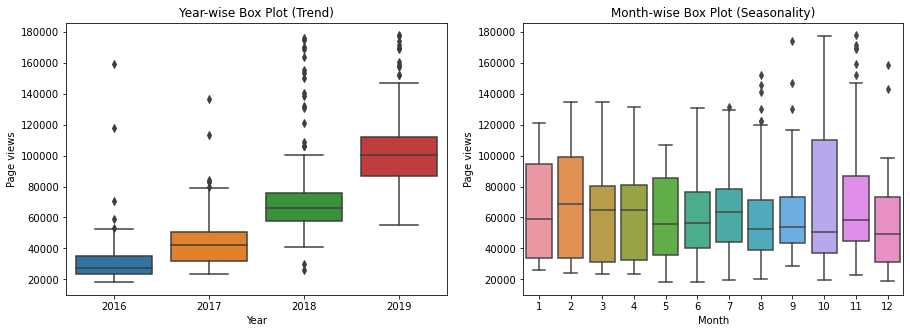

In [41]:
def draw_box_plot():
     # modifying the dataframe for box plot:
    new_df = df.copy()
    new_df.reset_index(inplace=True)
    new_df['month'] = pd.DatetimeIndex(new_df['date']).month
    new_df['year'] = pd.DatetimeIndex(new_df['date']).year
    
    new_df['month_num'] = pd.DatetimeIndex(new_df['date']).month
    new_df = new_df.sort_values('month_num')
    
    #df_new = df.groupby(['month', 'year'])['value'].mean()
    #df_new = df_new.unstack()
    
    fig, axes = plt.subplots(nrows=1,ncols=2,figsize= (15, 5))
    
    axes[0] = sns.boxplot(x = new_df['year'], 
                      y = new_df['value'],
                      ax=axes[0])
    
    axes[1] = sns.boxplot(x = new_df['month'], y=new_df['value'],
                         ax = axes[1])
    
    axes[0].set_title('Year-wise Box Plot (Trend)')
    axes[0].set_xlabel('Year')
    axes[0].set_ylabel('Page views')
    
    axes[1].set_title('Month-wise Box Plot (Seasonality)')
    axes[1].set_xlabel('Month')
    axes[1].set_ylabel('Page views')
    
    
    plt.show(fig)
    
draw_box_plot()